<a href="https://colab.research.google.com/github/mornville/TBBT/blob/master/TBBT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone darknet rep
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 13572 (delta 0), reused 2 (delta 0), pack-reused 13567
Receiving objects: 100% (13572/13572), 12.19 MiB | 6.91 MiB/s, done.
Resolving deltas: 100% (9255/9255), done.


In [2]:
# mounting google drive for file transfer
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile


/content/darknet


In [4]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [5]:
%cd ..
!cp gdrive/My\ Drive/YOLOv3/darknet/yolov3.weights darknet/

/content


In [0]:
# define helper functions
def imShow(path): 
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(width, height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(10, 5)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [7]:
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x

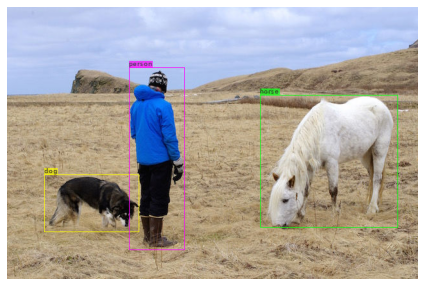

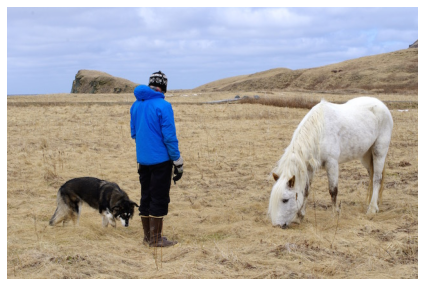

(None, None)

In [8]:
imShow('predictions.jpg'), imShow('data/person.jpg')

In [0]:
# Copying the dataset zip file
!cp gdrive/My\ Drive/obj.zip sample_data/

In [16]:
# Unzipping in darknet/data directory
!unzip sample_data/obj.zip -d darknet/data/ 

Archive:  sample_data/obj.zip
   creating: darknet/data/obj/
  inflating: darknet/data/__MACOSX/._obj  
  inflating: darknet/data/obj/Kaley Cuoco.119.txt  
  inflating: darknet/data/obj/Kaley Cuoco.118.txt  
  inflating: darknet/data/obj/Jim Parsons.109.txt  
  inflating: darknet/data/obj/Simon Helberg.119.txt  
  inflating: darknet/data/obj/Simon Helberg.118.txt  
  inflating: darknet/data/obj/Jim Parsons.108.txt  
  inflating: darknet/data/obj/Jim Parsons.120.txt  
  inflating: darknet/data/obj/Jim Parsons.118.txt  
  inflating: darknet/data/obj/Simon Helberg.108.txt  
  inflating: darknet/data/obj/.DS_Store  
  inflating: darknet/data/__MACOSX/obj/._.DS_Store  
  inflating: darknet/data/obj/Simon Helberg.109.txt  
  inflating: darknet/data/obj/Simon Helberg.109.jpeg  
  inflating: darknet/data/obj/Jim Parsons.119.txt  
  inflating: darknet/data/obj/Kaley Cuoco.108.txt  
  inflating: darknet/data/obj/Kaley Cuoco.120.txt  
  inflating: darknet/data/obj/Kaley Cuoco.109.txt  
  inflatin

In [17]:
%cd darknet/

/content/darknet


In [0]:
# !cp cfg/yolov3.cfg ../gdrive/My\ Drive/YOLOv3/yoloCustomConfig.cfg

In [0]:
# Edited custom config file to darknet/cfg/
!cp ../gdrive/My\ Drive/YOLOv3/yoloCustomConfig.cfg cfg/yolov3Custom12.cfg 

In [0]:
!cp ../gdrive/My\ Drive/obj.data data/

In [0]:
!cp ../gdrive/My\ Drive/obj.names ./data

In [0]:
image_files = []
os.chdir(os.path.join("data", "obj"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
%cd ..

In [22]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-05-31 14:00:05--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-05-31 14:00:05--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   333KB/s    in 9m 49s  

2020-05-31 14:09:56 (269 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
!./darknet detector train data/obj.data cfg/yolov3Custom12.cfg darknet53.conv.74 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3Custom12
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 

In [0]:
import os
os.listdir('backup/')

['yolov3Custom12_last.weights']

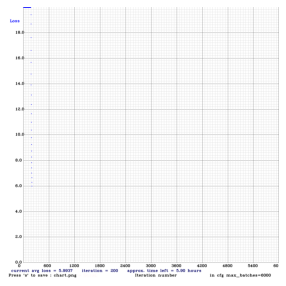

In [0]:
imShow('chart.png')

In [0]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3Custom12.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3Custom12.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [0]:
!./darknet detector test data/obj.data cfg/yolov3Custom12.cfg backup/yolov3Custom12_last.weights ../gdrive/My\ Drive/Kaley\ Cuoco.101.jpg -thresh 0.3


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

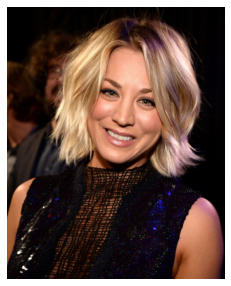

In [0]:
imShow('predictions.jpg')